### Find examples of fetalization eRegulons with associated DARs and DEGs

In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt 
import seaborn as sns

In [53]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

- Load in the TF->enhancer->gene triplets identified by SCENIC+

In [29]:
triplets_df = pd.read_csv("04_SCENICplus_direct_regulons.csv", index_col = 0)
triplets_df.head()

,Region,Gene,importance_R2G,rho_R2G,importance_x_rho,importance_x_abs_rho,TF,is_extended,eRegulon_name,Gene_signature_name,Region_signature_name,importance_TF2G,regulation,rho_TF2G,triplet_rank
11842,chr6:56555311-56555812,DST,0.122007,0.394807,0.048169,0.048169,MEIS2,False,MEIS2_direct_+/+,MEIS2_direct_+/+_(121g),MEIS2_direct_+/+_(140r),7.094421,1,0.294117,0
1609,chr10:94545512-94546013,HELLS,0.168279,0.151243,0.025451,0.025451,E2F1,False,E2F1_direct_+/+,E2F1_direct_+/+_(27g),E2F1_direct_+/+_(57r),1.452035,1,0.131914,1
8587,chr10:19815953-19816454,PLXDC2,0.145726,0.468607,0.068288,0.068288,FLI1,False,FLI1_direct_+/+,FLI1_direct_+/+_(389g),FLI1_direct_+/+_(1898r),5.697750,1,0.217382,2
2805,chr8:25922882-25923383,EBF2,0.058900,0.653548,0.038494,0.038494,EBF2,False,EBF2_direct_+/+,EBF2_direct_+/+_(258g),EBF2_direct_+/+_(532r),43.331950,1,1.000000,3
5015,chr7:122802129-122802630,CADPS2,0.116453,0.370728,0.043172,0.043172,ERG,False,ERG_direct_+/+,ERG_direct_+/+_(366g),ERG_direct_+/+_(1332r),5.647128,1,0.307433,4


- Load in the fetalization TFs predicted by SCENIC+ (>2 fold activity in fetal and diseased hearts)

In [30]:
fetalization_TFs = pd.read_csv("04B_fetal_disease_regulons.csv", index_col = 0)

### Fetalization genes for fibroblasts

In [34]:
cell_type = "Fibroblast"

# DARs
cell_type_fetalization_peaks = pd.read_csv("../pseudobulked_analysis/fetalization_peaks/" + cell_type + "_up_fetalization_genes.csv")
cell_type_fetalization_peaks_list = cell_type_fetalization_peaks['0']

# DEGs
cell_type_fetalization_genes = pd.read_csv("../../../RNA/aggregated_analysis/pseudobulked_analysis/pydeseq2/fetalization_genes/" + cell_type + "_up_fetalization_genes.csv")
cell_type_fetalization_genes_list = cell_type_fetalization_genes['0']

- Filter the triplets df to those that:

1. Involve the TF being a fetalization TF
2. Have the gene as a fetalization DEG
3. Have the linked peak as a fetalization DAR

In [35]:
cell_type_specific_fetalization_TFs = list(set(fetalization_TFs[fetalization_TFs['cell_type'] == cell_type]['TF']))

# first, filter the triplets df to those cell-type specific fetalization TFs
filtered_triplet_df = triplets_df[triplets_df['TF'].isin(cell_type_specific_fetalization_TFs)]

# then filter it to where the gene is a DEG
filtered_triplet_df = filtered_triplet_df[filtered_triplet_df['Gene'].isin(cell_type_fetalization_genes_list)]

# finally, filter it to where the peak is a DAR
filtered_triplet_df = filtered_triplet_df[filtered_triplet_df['Region'].isin(cell_type_fetalization_peaks_list)]

In [36]:
filtered_triplet_df

,Region,Gene,importance_R2G,rho_R2G,importance_x_rho,importance_x_abs_rho,TF,is_extended,eRegulon_name,Gene_signature_name,Region_signature_name,importance_TF2G,regulation,rho_TF2G,triplet_rank
1379,chr6:143806275-143806776,PLAGL1,0.030197,0.187933,0.005675,0.005675,BNC2,False,BNC2_direct_+/+,BNC2_direct_+/+_(175g),BNC2_direct_+/+_(386r),2.690165,1,0.203603,16052


### Visualize the expression of PLAGL1 in the scRNA-seq data

In [58]:
import scanpy as sc
sc._settings.settings._vector_friendly=True

In [39]:
%%time
RNA_adata = sc.read_h5ad("../../../RNA/aggregated_analysis/07_final_RNA_without_scvi.h5ad")

In [42]:
%%time
fibroblast_adata = RNA_adata[RNA_adata.obs.final_cell_type == "Fibroblast"].copy()

CPU times: user 11.8 s, sys: 23.3 s, total: 35.1 s
Wall time: 35.1 s


In [48]:
fibroblast_adata.obs['age_disease_status'] = fibroblast_adata.obs['age_status'].astype(str) + ":" + fibroblast_adata.obs['disease_binary'].astype(str)

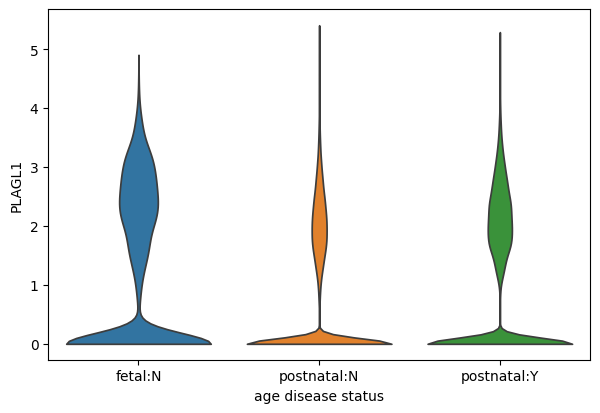

In [60]:
with plt.rc_context():
    sc.pl.violin(fibroblast_adata, keys = "PLAGL1", groupby="age_disease_status", size = 0.1, show=False, stripplot=False)
    plt.savefig("../../../paper_figures/PLAGL1_gene_expression.pdf")